# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
lat_lngs

Number of cities in the list: 603


In [3]:
cities

['keta',
 'mahibadhoo',
 'qaqortoq',
 'barentsburg',
 'salalah',
 'butaritari',
 'bethel',
 'saint-philippe',
 'kemijarvi',
 'mataura',
 'bogande',
 'hilo',
 'qaanaaq',
 'eureka',
 'houston',
 'busselton',
 'flin flon',
 'palmer',
 'sento se',
 'camacha',
 'samusu',
 'ribeira grande',
 'kruisfontein',
 'puerto ayora',
 'esperance',
 'ushuaia',
 'alice springs',
 'shelburne',
 'okha',
 'iwanai',
 'oktyabrskoye',
 'charlestown',
 'port elizabeth',
 'cidreira',
 'rikitea',
 'new norfolk',
 'kouango',
 'gueugnon',
 'torbay',
 'kiama',
 'tasiilaq',
 'chokurdakh',
 'alyangula',
 'moron',
 'oistins',
 'price',
 'odweyne',
 'yetkul',
 'namibe',
 'tuktoyaktuk',
 'taolanaro',
 'alekseyevsk',
 'cape town',
 'sentyabrskiy',
 'severo-kurilsk',
 'vagur',
 'wakkanai',
 'byron bay',
 'tadine',
 'avera',
 'victoria',
 'ust-ilimsk',
 'lorengau',
 'pringsewu',
 'klaksvik',
 'port alfred',
 'mehamn',
 'luanda',
 'chagda',
 'srednekolymsk',
 'quatre cocos',
 'thompson',
 'ancud',
 'bendigo',
 'parrita',
 '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=metric&q="
test_city = "keta"

responses = requests.get(query_url+test_city)

In [8]:
test = responses.json()
test['sys']['country']

'GH'

In [21]:


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | keta
Processing Record 2 of Set 1 | mahibadhoo
Processing Record 3 of Set 1 | qaqortoq
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | kemijarvi
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bogande
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | eureka
Processing Record 15 of Set 1 | houston
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | flin flon
Processing Record 18 of Set 1 | palmer
Processing Record 19 of Set 1 | sento se
City not found. Skipping...
Processing Record 20 of Set 1 | camacha
Processing Record 21 of Set 1 | samusu
City not found. Skipping...
Processing

Processing Record 38 of Set 4 | barrow
Processing Record 39 of Set 4 | karachi
Processing Record 40 of Set 4 | yuncheng
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | innisfail
Processing Record 43 of Set 4 | starobaltachevo
Processing Record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 45 of Set 4 | qarqin
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | hithadhoo
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | bure
Processing Record 0 of Set 5 | matamoros
Processing Record 1 of Set 5 | xucheng
Processing Record 2 of Set 5 | the valley
Processing Record 3 of Set 5 | zlatoustovsk
City not found. Skipping...
Processing Record 4 of Set 5 | ferme-neuve
Processing Record 5 of Set 5 | baoqing
Processing Record 6 of Set 5 | troitskoye
Processing Record 7 of Set 5 | khashuri
Processing Record 8 of Set 5 | spassk-ryazanskiy
Processing Record 9 of Set 5 | poso
Processing Record 10 of Set 5 | meyun

Processing Record 27 of Set 8 | katherine
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | susuman
Processing Record 30 of Set 8 | honningsvag
Processing Record 31 of Set 8 | celestun
Processing Record 32 of Set 8 | lekoni
Processing Record 33 of Set 8 | antalaha
Processing Record 34 of Set 8 | lolua
City not found. Skipping...
Processing Record 35 of Set 8 | sabang
Processing Record 36 of Set 8 | opuwo
Processing Record 37 of Set 8 | traverse city
Processing Record 38 of Set 8 | goundam
Processing Record 39 of Set 8 | kalakamati
Processing Record 40 of Set 8 | humen
Processing Record 41 of Set 8 | pinega
Processing Record 42 of Set 8 | miranorte
City not found. Skipping...
Processing Record 43 of Set 8 | iquitos
Processing Record 44 of Set 8 | sao raimundo nonato
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | maniitsoq
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | kloulklubed
Proc

Processing Record 12 of Set 12 | garowe
Processing Record 13 of Set 12 | la ronge
Processing Record 14 of Set 12 | alberton
Processing Record 15 of Set 12 | sarakhs
Processing Record 16 of Set 12 | saint-joseph
Processing Record 17 of Set 12 | skerries
Processing Record 18 of Set 12 | kerema
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | agirish
Processing Record 21 of Set 12 | ayorou
Processing Record 22 of Set 12 | orlik
Processing Record 23 of Set 12 | leticia
Processing Record 24 of Set 12 | puerto el triunfo
Processing Record 25 of Set 12 | toftir
City not found. Skipping...
Processing Record 26 of Set 12 | shankargarh
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | mwanza
Processing Record 29 of Set 12 | safaga
Processing Record 30 of Set 12 | teguldet
Processing Record 31 of Set 12 | hot springs
Processing Record 32 of Set 12 | sovetskiy
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | semnan
Pr

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [23]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,keta,5.9179,0.9879,28.29,77,83,5.61,GH,1680381138
1,mahibadhoo,3.7833,72.9667,27.70,76,14,3.92,MV,1680381139
2,qaqortoq,60.7167,-46.0333,-3.87,84,59,1.78,GL,1680381139
3,salalah,17.0151,54.0924,28.05,83,75,4.12,OM,1680381139
4,butaritari,3.0707,172.7902,27.45,75,100,5.67,KI,1680380907
5,bethel,41.3712,-73.4140,22.58,57,0,6.17,US,1680381140
6,saint-philippe,-21.3585,55.7679,25.77,83,44,5.28,RE,1680381140
7,kemijarvi,66.7131,27.4306,-6.55,89,34,4.17,FI,1680381140
8,mataura,-46.1927,168.8643,13.04,98,100,2.56,NZ,1680381140
9,bogande,12.9714,-0.1436,32.12,8,100,3.16,BF,1680380908


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keta,5.9179,0.9879,28.29,77,83,5.61,GH,1680381138
1,mahibadhoo,3.7833,72.9667,27.70,76,14,3.92,MV,1680381139
2,qaqortoq,60.7167,-46.0333,-3.87,84,59,1.78,GL,1680381139
3,salalah,17.0151,54.0924,28.05,83,75,4.12,OM,1680381139
4,butaritari,3.0707,172.7902,27.45,75,100,5.67,KI,1680380907


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

AttributeError: 'list' object has no attribute 'dtypes'

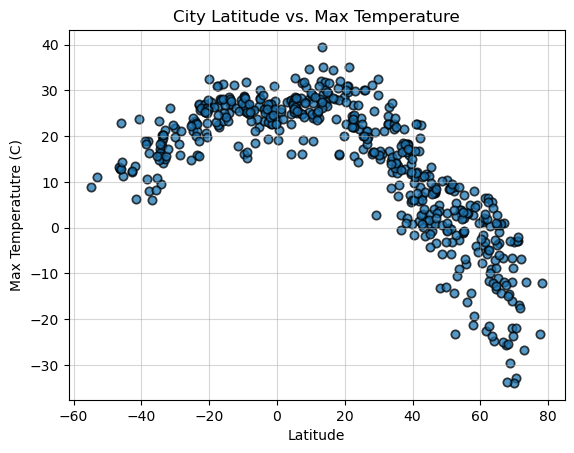

In [43]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='black', alpha=.75, linewidths= 1.25)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel('Max Temperatutre (C)')
plt.xlabel('Latitude')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

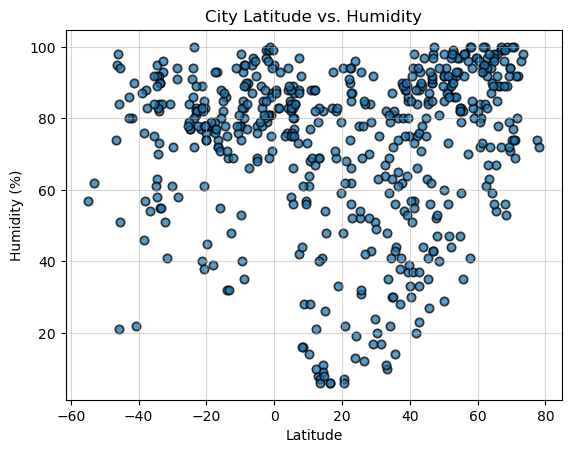

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='black', alpha=.75, linewidths= 1.25)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

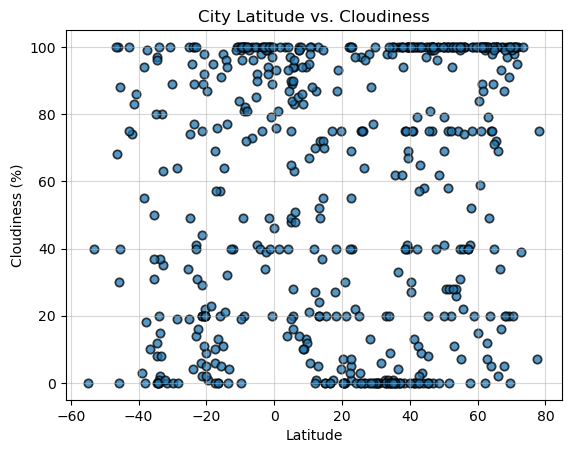

In [47]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='black', alpha=.75, linewidths= 1.25)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

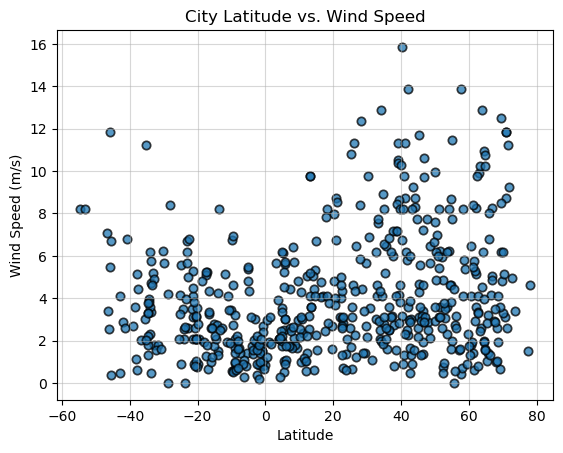

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='black', alpha=.75, linewidths= 1.25)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
x_value = ()
y_value = ()

#(slope, intercept, rvalue, pvalue, stderr)
lin_regress_eq = f"st.linregress({x_value},{y_value})"


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,keta,5.9179,0.9879,28.29,77,83,5.61,GH,1680381138
1,mahibadhoo,3.7833,72.9667,27.70,76,14,3.92,MV,1680381139
2,qaqortoq,60.7167,-46.0333,-3.87,84,59,1.78,GL,1680381139
3,salalah,17.0151,54.0924,28.05,83,75,4.12,OM,1680381139
4,butaritari,3.0707,172.7902,27.45,75,100,5.67,KI,1680380907


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,saint-philippe,-21.3585,55.7679,25.77,83,44,5.28,RE,1680381140
8,mataura,-46.1927,168.8643,13.04,98,100,2.56,NZ,1680381140
14,busselton,-33.6500,115.3333,14.18,90,2,3.35,AU,1680381141
19,kruisfontein,-34.0033,24.7314,15.11,73,1,2.32,ZA,1680381142
20,puerto ayora,-0.7393,-90.3518,30.98,87,89,2.68,EC,1680381143


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and temperature in the nothern hemisphere is -0.88


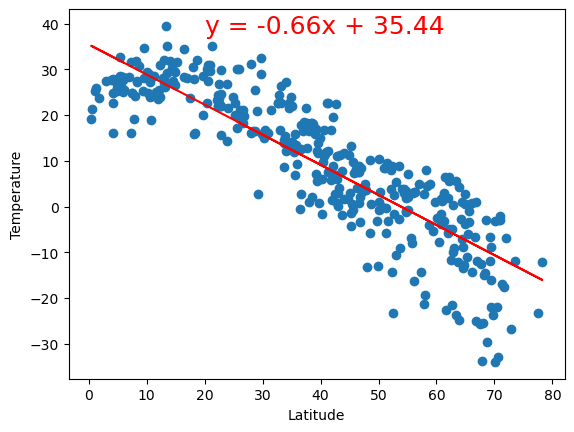

In [106]:
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df['Max Temp']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and temperature in the nothern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

The correlation between latitude and temperature in the southern hemisphere is 0.69


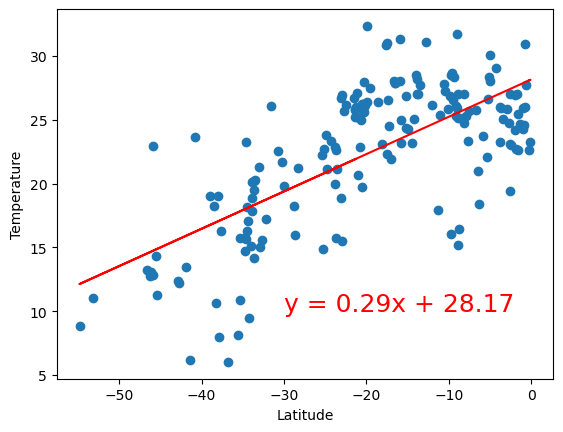

In [82]:
# Linear regression on Southern Hemisphere
x_value_south = southern_hemi_df["Lat"]
y_value_south = southern_hemi_df['Max Temp']


corr_coef = st.pearsonr(x_value_south,y_value_south)
print(f"The correlation between latitude and temperature in the southern hemisphere is {round(corr_coef[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value_south,y_value_south)

regress_values = x_value_south * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_south,y_value_south)
plt.plot(x_value_south,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

**Discussion about the linear relationship:** TThe graphs show that as you move further from the equator, the temperatures become colder. There is a higher correlation in the north vs the south.

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity in the northern hemisphere is 0.32


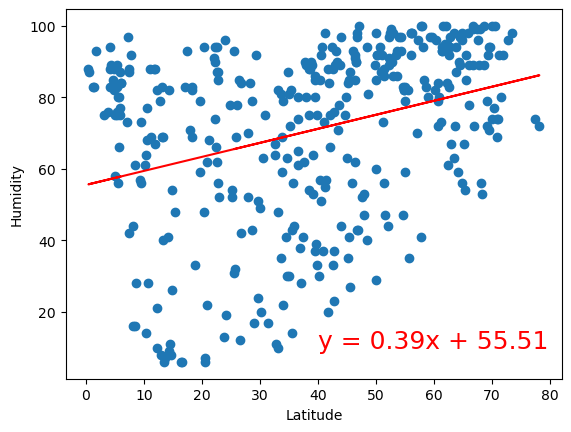

In [89]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df['Humidity']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and humidity in the northern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The correlation between latitude and humidity in the southern hemisphere is -0.19


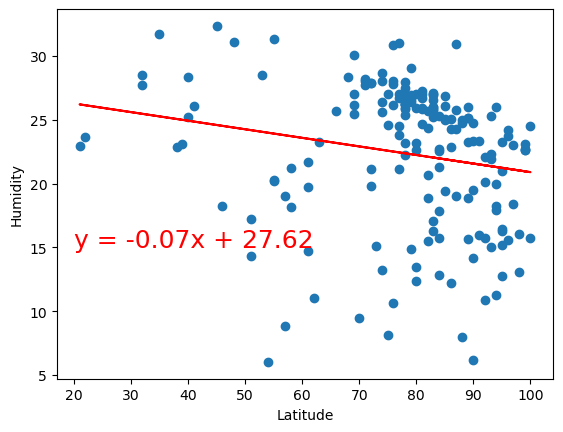

In [90]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
x_value = southern_hemi_df["Humidity"]
y_value = southern_hemi_df['Max Temp']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and humidity in the southern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Both graphs show a slgiht trend of becoming less humid as you move further from the equator. However, both coreelation coeffecients are small.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness in the northern hemisphere is 0.19


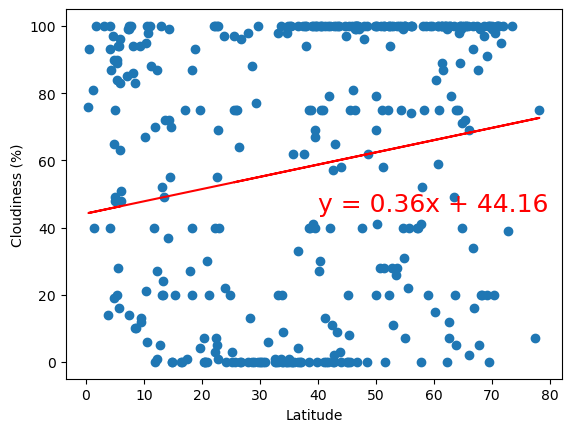

In [94]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df['Cloudiness']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and cloudiness in the northern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,45),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The correlation between latitude and cloudiness in the southern hemisphere is 0.34


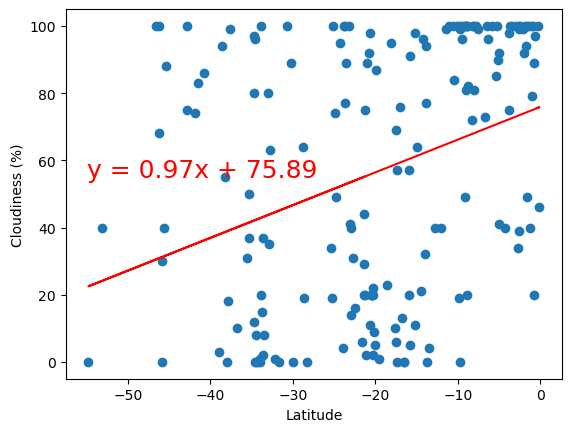

In [105]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df['Cloudiness']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and cloudiness in the southern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-55,55),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a relationship between lattitude and cloudiness. Both correlation coeffecients are small and do not show a pattern in their trend line.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed in the northern hemisphere is 0.19


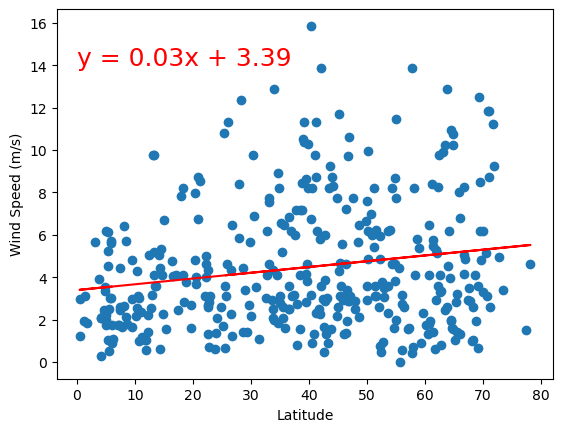

In [101]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df['Wind Speed']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and wind speed in the northern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The correlation between latitude and wind speed in the southern hemisphere is -0.41


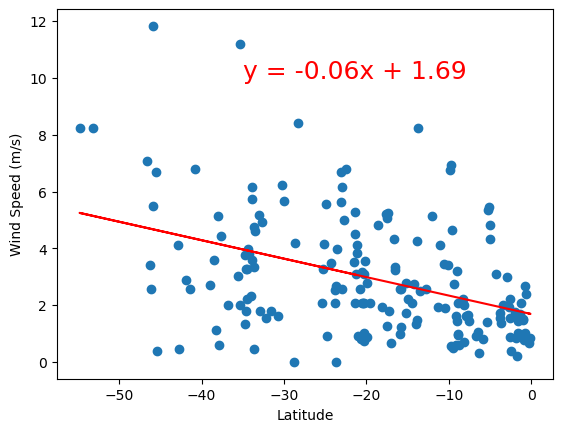

In [104]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df['Wind Speed']

corr_coef = st.pearsonr(x_value,y_value)
print(f"The correlation between latitude and wind speed in the southern hemisphere is {round(corr_coef[0],2)}")


(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_value,y_value)

regress_values = x_value * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-35,10),fontsize=18,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** There does not appear to be a relationship between lattitude and wind speed.